In [139]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage.filters import roberts, sobel, sobel_h, sobel_v, scharr, \
    scharr_h, scharr_v, prewitt, prewitt_v, prewitt_h
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline

In [2]:
path =  r'C:\Users\604572\Desktop\Sea Lion Counting\results\bbox_chips\adult_females\41_adult_females_1.png'

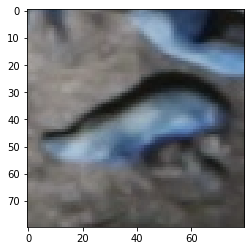

In [63]:
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
image.shape
image_color = cv2.imread(path)
plt.imshow(image_color)

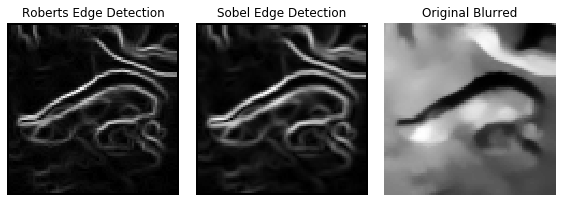

In [235]:
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
#image = cv2.GaussianBlur(image, (7,7),3,3)
#image = cv2.medianBlur(image, 3)
#print(image.shape)
image = cv2.bilateralFilter(image, 10,20,20)


edge_roberts = roberts(image)
edge_sobel = sobel(image)
fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                       figsize=(8, 4))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')
ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')
ax[2].imshow(image, cmap=plt.cm.gray)
ax[2].set_title('Original Blurred')
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

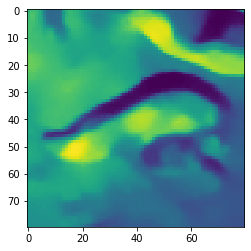

In [236]:
plt.imshow(image)

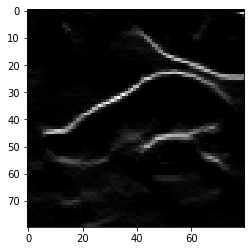

In [237]:
des = cv2.morphologyEx(image,cv2.MORPH_BLACKHAT,(5,5))
plt.imshow(des,cmap=plt.cm.gray)

In [202]:
img = des.copy()

In [205]:
contours, _ = cv2.findContours(des, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
drawn_c = cv2.drawContours(img, contours, -1,(0,255,0),0)

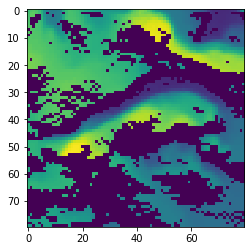

In [206]:
plt.imshow(drawn_c)